In [3]:
#1. Import dataset and display first 5 rows
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
#2. Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [4]:
#Check the shape of the Data Frame (rows, columns)
df.shape

(200, 2)

In [5]:
#Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


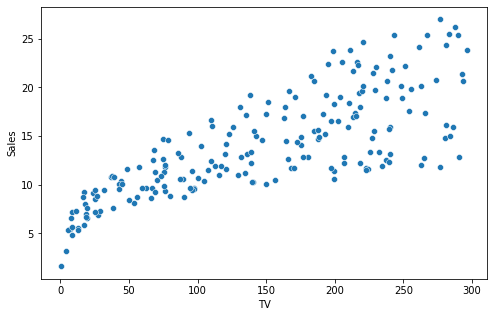

In [33]:
#Visualize the relationship between the features and the dependent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [9]:
#Prepare X (feature variables) and y (response variable
print(df['TV'])
print(df['Sales'])

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [4]:
#Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X=df['TV']
Y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print(x_train,x_test,y_train,y_test)

49      66.9
64     131.1
50     199.8
99     135.2
155      4.1
       ...  
171    164.5
132      8.4
183    287.6
73     129.4
105    137.9
Name: TV, Length: 140, dtype: float64 43     206.9
19     147.3
85     193.2
144     96.2
59     210.7
52     216.4
189     18.7
115     75.1
138     43.0
120    141.3
195     38.2
41     177.0
122    224.0
147    243.2
101    296.4
57     136.2
180    156.6
93     250.9
121     18.8
60      53.5
42     293.6
18      69.2
196     94.2
66      31.5
116    139.2
22      13.2
106     25.0
63     102.7
11     214.7
129     59.6
188    286.0
135     48.3
37      74.7
86      76.3
164    117.2
17     281.4
32      97.2
136     25.6
160    172.5
62     239.3
3      151.5
31     112.9
182     56.2
82      75.3
5        8.7
168    215.4
192     17.2
162    188.4
146    240.1
98     289.7
69     216.8
20     218.4
12      23.8
131    265.2
161     85.7
13      97.5
29      70.6
176    248.4
44      25.1
10      66.1
Name: TV, dtype: float64 49      9.7
64

In [32]:
#Print the shape of train data and test dat
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [12]:
#Perform Linear Regression (on train data) without using any library and print the coefficients values
import numpy as np

x_b=np.c_[np.ones((x_train.shape[0],1)),x_train]

theta=np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y_train
print("Intercept :",theta[0])
print("coefficient :",theta[1:])

Intercept : 7.113144353318575
coefficient : [0.04681371]


In [13]:
#Create the model using the calculated coefficients and make predictions on
#the testing set
x_b=np.c_[np.ones((x_train.shape[0],1)),x_train]
y_pred=x_b.dot(theta)
print("predicted Sales values:",y_pred[:5])

predicted Sales values: [10.24498139 13.25042142 16.46652314 13.44235762  7.30508055]


In [6]:
#.Perform Linear Regression using library(sklearn)
#Print the intercept and coefficients
#Make predictions on the testing set - y_pred
from sklearn.linear_model import LinearRegression
import numpy as np
model=LinearRegression()
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_pred=model.fit(x_train,y_train)
print("intercept:",model.intercept_[0])
print("coefficinet:",model.coef_[0][0])
x_test=x_test.to_numpy().reshape(-1,1)
y_pred=model.predict(x_test)
print("ye predictions of model is:",y_pred[:5])

intercept: 6.961398871880793
coefficinet: 0.049883137791087585
ye predictions of model is: [[15.72586618]
 [18.93834026]
 [ 8.53271771]
 [19.01815328]
 [16.62376266]]


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np
model=LinearRegression()
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_pred=model.fit(x_train,y_train)
print(model.intercept_[0])
print(model.coef_[0][0])

7.113144353318581
0.04681370762689101


In [27]:
print(y_pred[:5])

[[ 7.78642412]
 [11.06456647]
 [19.8601801 ]
 [11.64277394]
 [13.44599724]]


In [30]:
print(model.intercept_[0])

6.865212220411539


In [31]:
print(model.coef_[0][0])

0.04900063302731314


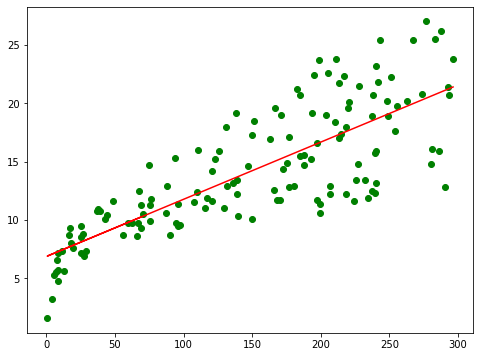

In [38]:
#.Plot train data and the model
y_train_pred=model.predict(x_train)
plt.figure(figsize=(8,6))
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,y_train_pred,color='red')
plt.show()

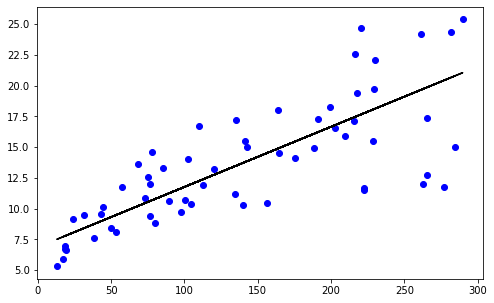

In [40]:
#Plot test data and the mode
y_test_pred=model.predict(x_test)
plt.figure(figsize=(8,5))
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_test_pred,color='black')
plt.show()

In [11]:
#Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score

y_test=np.array(y_test).flatten()
y_pred=np.array(y_pred).flatten()

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean square error:",mse)
print("r2 value:",r2)

mean square error: 0.0
r2 value: 1.0


In [26]:
#Calculate and print R Squared and Adjusted R Squared values without any library
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
x_test=np.array(y_test).reshape(-1,1)
y_pred=model.predict(x_test)
y_pred=np.array(y_pred).reshape(-1,1)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,r2)

56.95679707560726 -1.1725003252447976


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Ensure NumPy is imported

# Flattening the arrays in case they are not 1D
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing results
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.0
R² Score: 1.0
